In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
      --------------------------------------- 0.1/5.6 MB 2.6 MB/s eta 0:00:03
     - -------------------------------------- 0.2/5.6 MB 1.8 MB/s eta 0:00:03
     - -------------------------------------- 0.3/5.6 MB 2.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.5/5.6 MB 3.3 MB/s eta 0:00:02
     ----- ---------------------------------- 0.8/5.6 MB 3.8 MB/s eta 0:00:02
     ------- -------------------------------- 1.0/5.6 MB 4.1 MB/s eta 0:00:02
     ------- -------------------------------- 1.1/5.6 MB 4.0 MB/s eta 0:00:02
     -------- ------------------------------- 1.1/5.6 MB 3.5 MB/s eta 0:00:02
     --------- ------------------------------ 1.4/5.6 MB 3.4 MB/s eta 0:00:02
     --------- ------------------------------ 1.4/5.6 MB 3.6 MB/s eta 0:00:02
     --------- ------------------------------ 1.4/5.6 MB 3.6 MB/s eta 0:00:02
     -------

     --------------------------- ------------ 1.7/2.5 GB 1.9 MB/s eta 0:06:48
     --------------------------- ------------ 1.7/2.5 GB 2.0 MB/s eta 0:06:43
     --------------------------- ------------ 1.7/2.5 GB 2.0 MB/s eta 0:06:41
     --------------------------- ------------ 1.7/2.5 GB 2.0 MB/s eta 0:06:44
     --------------------------- ------------ 1.7/2.5 GB 2.0 MB/s eta 0:06:44
     --------------------------- ------------ 1.7/2.5 GB 2.0 MB/s eta 0:06:43
     --------------------------- ------------ 1.7/2.5 GB 2.2 MB/s eta 0:05:53
     --------------------------- ------------ 1.7/2.5 GB 2.2 MB/s eta 0:05:53
     --------------------------- ------------ 1.7/2.5 GB 2.2 MB/s eta 0:05:52
     --------------------------- ------------ 1.7/2.5 GB 2.2 MB/s eta 0:05:54
     --------------------------- ------------ 1.7/2.5 GB 2.2 MB/s eta 0:05:54
     --------------------------- ------------ 1.7/2.5 GB 2.2 MB/s eta 0:05:54
     --------------------------- ------------ 1.7/2.5 GB 2.2 MB/

In [2]:
!pip install requests transformers beautifulsoup4

In [341]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re


In [342]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [343]:
tokens = tokenizer.encode("'Apple is tracking iPhones stolen by looters' -Earlier NY Post Article", return_tensors='pt')


In [344]:
result = model(tokens)

In [345]:
result.logits

tensor([[ 1.7787,  0.6862,  0.0911, -0.8628, -1.2412]],
       grad_fn=<AddmmBackward0>)

In [346]:
int(torch.argmax(result.logits))+1

1

In [347]:
print(torch.argmax(result.logits))

tensor(0)


In [348]:
#loading the news dataset
import yfinance as yfin
#taking a bigger timeframe for better accuracy
start = '2020-05-26'
end = '2020-06-10'

df = yfin.download('AAPL',start,end)
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-03,81.165001,81.550003,80.574997,81.279999,79.588371,104491200
2020-06-04,81.097504,81.404999,80.195000,80.580002,78.902939,87560400
2020-06-05,80.837502,82.937500,80.807503,82.875000,81.150169,137250400
2020-06-08,82.562500,83.400002,81.830002,83.364998,81.629990,95654400
2020-06-09,83.035004,86.402496,83.002502,85.997498,84.207695,147712400


In [224]:
df_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-20,69.487503,70.419998,69.212502,69.232498,67.608582,130015200
2020-04-21,69.070000,69.312500,66.357498,67.092499,65.518784,180991600
2020-04-22,68.402496,69.474998,68.050003,69.025002,67.405968,116862400
2020-04-23,68.967499,70.437500,68.717499,68.757500,67.144737,124814400
2020-04-24,69.300003,70.752502,69.250000,70.742500,69.083183,126161200
2020-04-27,70.449997,71.135002,69.987503,70.792503,69.132019,117087600
2020-04-28,71.269997,71.457497,69.550003,69.644997,68.011421,112004800
2020-04-29,71.182503,72.417503,70.972504,71.932503,70.245270,137280800
2020-04-30,72.489998,73.632500,72.087502,73.449997,71.727165,183064000


In [225]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,71.704667,72.810167,71.141668,71.949500,70.275532,1.427737e+08
std,2.589576,2.651671,2.839189,2.991316,2.948826,3.451249e+07
min,68.402496,69.312500,66.357498,67.092499,65.518784,1.120048e+08
25%,69.393753,70.595001,69.231251,69.438747,67.810001,1.209510e+08
50%,71.269997,72.417503,70.972504,71.932503,70.245270,1.335680e+08
75%,73.127499,75.000000,72.851250,73.919998,72.186146,1.450424e+08
max,76.410004,77.587502,76.072502,77.532501,75.918877,2.406168e+08


In [226]:
# link the titles with the dates of original dataset
# make null or 0 values as some common value
#2020/4/20 to 2020/5/10
dataset = dataset[3788:3927]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   title       0 non-null      object 
 2   date        0 non-null      object 
 3   stock       0 non-null      object 
dtypes: float64(1), object(3)
memory usage: 132.0+ bytes


In [227]:
dataset

,Unnamed: 0,title,date,stock


In [401]:
ds_11 = pd.read_csv("C:/Users/meyas/Python/ML/StockPrediction/analyst_ratings_processed.csv/customised_data_11day.csv")

In [402]:
ds_11

,Title,Date,Stock
0,Apple shares are trading higher despite marke...,09-06-2020,AAPL
1,Apple Gets Patent For Socially-Distanced Grou...,08-06-2020,AAPL
2,"Wedbush Maintains Outperform on Apple, Raises ...",05-06-2020,AAPL
3,FAANG Stocks Seem Immune To COVID-19 'Apple's ...,04-06-2020,AAPL
4,Morgan Stanley Bullish On Rising App Store Rev...,03-06-2020,AAPL
5,Apple is tracking iPhones stolen by looters' -...,02-06-2020,AAPL
6,Apple CEO Writes To Employees About George Flo...,01-06-2020,AAPL
7,Costco Shares Come Under Pressure Despite Stro...,29-05-2020,AAPL
8,Martin Scorsese's Next Movie Will Be Financed ...,28-05-2020,AAPL
9,3 Apple Analysts Lift Price Targets: Why They'...,27-05-2020,AAPL


In [229]:
reversed_df = ds_11.iloc[::-1]

In [230]:
reversed_df

,Title,Date,Stock
10,"'FAANG Stocks Are Strong Once Again,' Faceboo...",26-05-2020,AAPL
9,3 Apple Analysts Lift Price Targets: Why They'...,27-05-2020,AAPL
8,Martin Scorsese's Next Movie Will Be Financed ...,28-05-2020,AAPL
7,Costco Shares Come Under Pressure Despite Stro...,29-05-2020,AAPL
6,Apple CEO Writes To Employees About George Flo...,01-06-2020,AAPL
5,Apple is tracking iPhones stolen by looters' -...,02-06-2020,AAPL
4,Morgan Stanley Bullish On Rising App Store Rev...,03-06-2020,AAPL
3,FAANG Stocks Seem Immune To COVID-19 'Apple's ...,04-06-2020,AAPL
2,"Wedbush Maintains Outperform on Apple, Raises ...",05-06-2020,AAPL
1,Apple Gets Patent For Socially-Distanced Grou...,08-06-2020,AAPL


In [231]:
values = []
for i in reversed_df['Title']:
    tokens = tokenizer.encode(i, return_tensors='pt')
    print(i,'\n')
    result = model(tokens)
    val =int(torch.argmax(result.logits))+1
    values.append(val)

 'FAANG Stocks Are Strong Once Again,' Facebook, Amazon, Netflix Hit Record Highs Last Wee 

3 Apple Analysts Lift Price Targets: Why They're Optimistic On iPhone's Trajectory  

Martin Scorsese's Next Movie Will Be Financed By Apple 

Costco Shares Come Under Pressure Despite Strong Earnings, Same-Store Sales 

Apple CEO Writes To Employees About George Floyd Death, Urges For 'Better, More Just World For Everyone' Amazon, Apple, Walmart, Other Retailers Shutter Stores, Scale Back Operations In Areas Worst Hit With Protests 

Apple is tracking iPhones stolen by looters' -Earlier NY Post Article 

Morgan Stanley Bullish On Rising App Store Revenue, Raises Apple Price Target  

FAANG Stocks Seem Immune To COVID-19 'Apple's #iPhone to join Beijing's 12.2 billion yuan ($1.7 billion) consumption voucher program: 

Wedbush Maintains Outperform on Apple, Raises Price Target to $375 Credit Suisse Maintains Neutral on Apple, Raises Price Target to $295  

 Apple Gets Patent For Socially-Distanc

In [359]:
#loading the news dataset
import yfinance as yfin
#taking a bigger timeframe for better accuracy
start = '2020-05-26'
end = '2020-06-10'

df = yfin.download('AAPL',start,end)
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-03,81.165001,81.550003,80.574997,81.279999,79.588371,104491200
2020-06-04,81.097504,81.404999,80.195000,80.580002,78.902939,87560400
2020-06-05,80.837502,82.937500,80.807503,82.875000,81.150162,137250400
2020-06-08,82.562500,83.400002,81.830002,83.364998,81.629982,95654400
2020-06-09,83.035004,86.402496,83.002502,85.997498,84.207680,147712400


In [360]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
sentiment_scaler1 = MinMaxScaler(feature_range=(1, 1.5))
sentiment_scaler2 = MinMaxScaler(feature_range=(1, 1.3))

scaler = MinMaxScaler(feature_range=(0,1))
values
values = np.array(values)
values = values.reshape(-1,1)
values.shape

val1= sentiment_scaler1.fit_transform(values)
val2 =sentiment_scaler2.fit_transform(values)

In [361]:

# df = df.reset_index()
# df = df.drop(['Date','Adj Close'],axis =1)
df['sentiment_val'] = values
df['val1'] = val1
df['val2'] = val2

In [362]:
df

,Open,High,Low,Close,Adj Close,Volume,sentiment_val,val1,val2
Date,,,,,,,,,
2020-05-26,80.875000,81.059998,79.125000,79.182503,77.534523,125522000,5,1.500,1.300
2020-05-27,79.035004,79.677498,78.272499,79.527496,77.872353,112945200,4,1.375,1.225
2020-05-28,79.192497,80.860001,78.907501,79.562500,77.906624,133560800,4,1.375,1.225
2020-05-29,79.812500,80.287498,79.117500,79.485001,77.830734,153532400,2,1.125,1.075
2020-06-01,79.437500,80.587502,79.302498,80.462502,78.787872,80791200,1,1.000,1.000
2020-06-02,80.187500,80.860001,79.732498,80.834999,79.152634,87642800,1,1.000,1.000
2020-06-03,81.165001,81.550003,80.574997,81.279999,79.588371,104491200,1,1.000,1.000
2020-06-04,81.097504,81.404999,80.195000,80.580002,78.902939,87560400,1,1.000,1.000
2020-06-05,80.837502,82.937500,80.807503,82.875000,81.150162,137250400,1,1.000,1.000


In [363]:
#getting the larger dataset for last 100 day values

start = '2019-12-30'
end = '2020-06-10'

df_real = yfin.download('AAPL',start,end)
df_re = df_real.Close

df_re = np.array(df_re)
print(df_re.shape)

x_input = df_re[:100]
x_input = x_input.reshape(1,-1)
print(x_input.shape)


[*********************100%%**********************]  1 of 1 completed
(112,)
(1, 100)


In [364]:
scaler = MinMaxScaler(feature_range=(0,1))
x_input = x_input.reshape(-1,1)
x_input = scaler.fit_transform(x_input)
x_input =x_input.reshape(1,-1)

In [365]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
len(temp_input)
temp_input

[0.6530193789408267,
 0.6737332224574675,
 0.7388894131948214,
 0.7104929049536226,
 0.7335406023503546,
 0.7198289140278744,
 0.7665077722913614,
 0.8291354234739878,
 0.8359425962165687,
 0.9004179806465817,
 0.8587959047156075,
 0.8457647259235253,
 0.8836913353597264,
 0.9176310433430852,
 0.8966254680914334,
 0.9076145247384355,
 0.9224934367779047,
 0.9135465022759823,
 0.8225226396291001,
 0.9075171819011176,
 0.9721869552288238,
 0.9676162935290162,
 0.8279684965339422,
 0.8197023683393607,
 0.9187979702831313,
 0.9440824754995796,
 0.9806474723210985,
 0.9302731475628381,
 0.945054716764989,
 0.9261886064957348,
 1.0,
 0.9773410803986544,
 0.9781192295433137,
 0.9202566289581884,
 0.9651850968116067,
 0.9328987331779408,
 0.8623940283730627,
 0.7177864951058512,
 0.6195660883671152,
 0.6640084355878288,
 0.4779732152873364,
 0.47641721377496093,
 0.7239131583180343,
 0.6316250258937881,
 0.762131499489247,
 0.666634317979875,
 0.6288047546040492,
 0.40649626921704884,
 0.59292

In [366]:
#using stacked lstm model
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import pandas_datareader as data
import datetime
import yfinance as yfin
from keras.models import load_model
model = load_model("tesla_model.h5")

from numpy import array
lst_output = []
new_op = []
n_steps = 100
i =0
while(i<11):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        y_hat = model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,y_hat))
        temp_input.extend(y_hat[0].tolist())
        temp_input =temp_input[1:]
        lst_output.extend(y_hat.tolist())
        new_op.append(y_hat[0]) #
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        y_hat = model.predict(x_input,verbose =0) # verbose =1,shows a bar when prediction is done
        print(y_hat[0])
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))
        lst_output.extend(y_hat.tolist())
        new_op.append(y_hat[0]) #
        i=i+1
print(lst_output)        

# sentiment_scaler.fit_transform(df['sentiment_val'])

[0.8190128]
101
1 day input [0.67373322 0.73888941 0.7104929  0.7335406  0.71982891 0.76650777
 0.82913542 0.8359426  0.90041798 0.8587959  0.84576473 0.88369134
 0.91763104 0.89662547 0.90761452 0.92249344 0.9135465  0.82252264
 0.90751718 0.97218696 0.96761629 0.8279685  0.81970237 0.91879797
 0.94408248 0.98064747 0.93027315 0.94505472 0.92618861 1.
 0.97734108 0.97811923 0.92025663 0.9651851  0.93289873 0.86239403
 0.7177865  0.61956609 0.66400844 0.47797322 0.47641721 0.72391316
 0.63162503 0.7621315  0.66663432 0.62880475 0.40649627 0.59292027
 0.49654759 0.23203342 0.52124864 0.17349031 0.27705923 0.21686278
 0.19848294 0.04735981 0.         0.21890505 0.20567933 0.33132356
 0.22726837 0.29602254 0.29096561 0.16084806 0.19994159 0.16571045
 0.37051444 0.340951   0.40552373 0.42419516 0.47534763 0.60954957
 0.58407068 0.60604879 0.56821923 0.51113477 0.42789062 0.50306333
 0.49265774 0.56987257 0.57181765 0.52718061 0.61616265 0.67519188
 0.62919383 0.66896817 0.71175717 0.741612

9 day output [[0.80204636]]
10 day input [0.8587959  0.84576473 0.88369134 0.91763104 0.89662547 0.90761452
 0.92249344 0.9135465  0.82252264 0.90751718 0.97218696 0.96761629
 0.8279685  0.81970237 0.91879797 0.94408248 0.98064747 0.93027315
 0.94505472 0.92618861 1.         0.97734108 0.97811923 0.92025663
 0.9651851  0.93289873 0.86239403 0.7177865  0.61956609 0.66400844
 0.47797322 0.47641721 0.72391316 0.63162503 0.7621315  0.66663432
 0.62880475 0.40649627 0.59292027 0.49654759 0.23203342 0.52124864
 0.17349031 0.27705923 0.21686278 0.19848294 0.04735981 0.
 0.21890505 0.20567933 0.33132356 0.22726837 0.29602254 0.29096561
 0.16084806 0.19994159 0.16571045 0.37051444 0.340951   0.40552373
 0.42419516 0.47534763 0.60954957 0.58407068 0.60604879 0.56821923
 0.51113477 0.42789062 0.50306333 0.49265774 0.56987257 0.57181765
 0.52718061 0.61616265 0.67519188 0.62919383 0.66896817 0.71175717
 0.74161234 0.77185629 0.83399782 0.88145482 0.84644553 0.80988024
 0.82826023 0.8104637  0.8809

In [367]:
len(lst_output)

11

In [399]:
day_new = np.arange(0,111)
day_pred = np.arange(100,111)
length = len(df_real.Close)

# final_output = scaler.inverse_transform(lst_output)
# sum(final_output)/30*
lst = np.array(lst_output)
# value = data_test[-1]
# print(value)
# value = int(sum(lst))-(30*value)
# print(value.dtype)
# print(sum(lst),value)
length

112

In [400]:
import math
from sklearn.metrics import mean_squared_error
print("Testing error (orig) = ",math.sqrt(mean_squared_error(df_re[100:111],lst_output)))
print("Testing error (val1)= ",math.sqrt(mean_squared_error(df_re[100:111],lst_output*val1)))
print("Testing error (val2)= ",math.sqrt(mean_squared_error(df_re[100:111],lst_output*val2)))

Testing error (orig) =  79.81532815475141
Testing error (val1)=  79.66659387175858
Testing error (val2)=  79.72604637887132


In [373]:
df_re[100:111]

array([79.72250366, 79.18250275, 79.52749634, 79.5625    , 79.48500061,
       80.46250153, 80.83499908, 81.27999878, 80.58000183, 82.875     ,
       83.36499786])

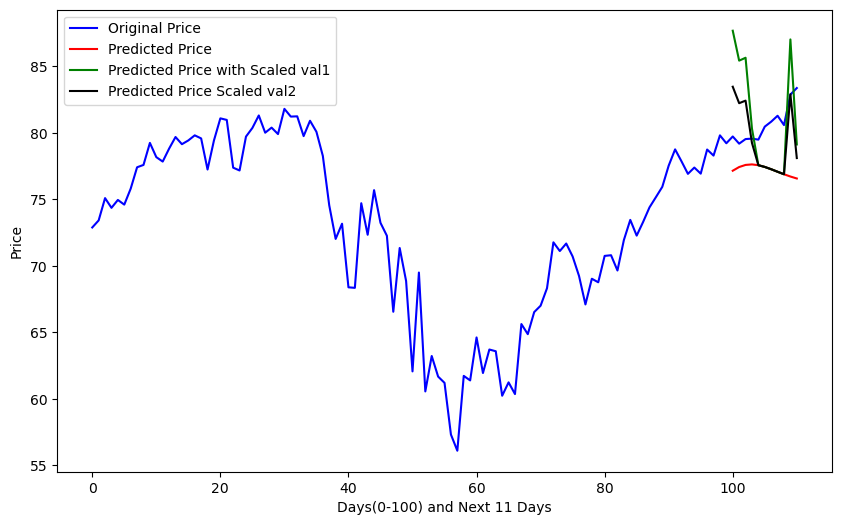

In [383]:
plt.figure(figsize = (10,6))
plt.plot(day_new,(df_real.Close[0:111]),'b',label = "Original Price")
plt.plot(day_pred,scaler.inverse_transform(lst_output),'r',label = "Predicted Price")
plt.plot(day_pred,scaler.inverse_transform(lst_output*val1),'g',label = "Predicted Price with Scaled val1")
plt.plot(day_pred,scaler.inverse_transform(lst_output*val2),'black',label = "Predicted Price Scaled val2")

plt.ylabel("Price")
plt.xlabel("Days(0-100) and Next 11 Days")
plt.legend()
plt.show()